In [52]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%  matplotlib inline

from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats

In [53]:
import pandas_profiling as pdp

In [54]:
df_train=pd.read_csv("application_train.csv")

In [55]:
df_train

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.000,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.000,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.000,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.000,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.000,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
5,100008,0,Cash loans,M,N,Y,0,99000.000,490495.5,27517.5,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
6,100009,0,Cash loans,F,Y,Y,1,171000.000,1560726.0,41301.0,...,0,0,0,0,0.0,0.0,0.0,1.0,1.0,2.0
7,100010,0,Cash loans,M,Y,Y,0,360000.000,1530000.0,42075.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
8,100011,0,Cash loans,F,N,Y,0,112500.000,1019610.0,33826.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
9,100012,0,Revolving loans,M,N,Y,0,135000.000,405000.0,20250.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [56]:
df_train.shape

(307511, 122)

In [57]:
df_train.dtypes.unique()

array([dtype('int64'), dtype('O'), dtype('float64')], dtype=object)

In [58]:
df_train.dtypes

SK_ID_CURR                      int64
TARGET                          int64
NAME_CONTRACT_TYPE             object
CODE_GENDER                    object
FLAG_OWN_CAR                   object
FLAG_OWN_REALTY                object
CNT_CHILDREN                    int64
AMT_INCOME_TOTAL              float64
AMT_CREDIT                    float64
AMT_ANNUITY                   float64
AMT_GOODS_PRICE               float64
NAME_TYPE_SUITE                object
NAME_INCOME_TYPE               object
NAME_EDUCATION_TYPE            object
NAME_FAMILY_STATUS             object
NAME_HOUSING_TYPE              object
REGION_POPULATION_RELATIVE    float64
DAYS_BIRTH                      int64
DAYS_EMPLOYED                   int64
DAYS_REGISTRATION             float64
DAYS_ID_PUBLISH                 int64
OWN_CAR_AGE                   float64
FLAG_MOBIL                      int64
FLAG_EMP_PHONE                  int64
FLAG_WORK_PHONE                 int64
FLAG_CONT_MOBILE                int64
FLAG_PHONE  

In [59]:
df_train.isnull().any().any()

True

In [60]:
df_anynull_df=df_train.loc[:,df_train.isnull().any()]
df_anynull_df
# list(df_anynull_df.columns) ,len(list(df_anynull_df.columns))

,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,OWN_CAR_AGE,OCCUPATION_TYPE,CNT_FAM_MEMBERS,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,...,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,24700.5,351000.0,Unaccompanied,NaN,Laborers,1.0,0.083037,0.262949,0.139376,0.0247,...,2.0,2.0,2.0,-1134.0,0.0,0.0,0.0,0.0,0.0,1.0
1,35698.5,1129500.0,Family,NaN,Core staff,2.0,0.311267,0.622246,NaN,0.0959,...,0.0,1.0,0.0,-828.0,0.0,0.0,0.0,0.0,0.0,0.0
2,6750.0,135000.0,Unaccompanied,26.0,Laborers,1.0,NaN,0.555912,0.729567,NaN,...,0.0,0.0,0.0,-815.0,0.0,0.0,0.0,0.0,0.0,0.0
3,29686.5,297000.0,Unaccompanied,NaN,Laborers,2.0,NaN,0.650442,NaN,NaN,...,0.0,2.0,0.0,-617.0,NaN,NaN,NaN,NaN,NaN,NaN
4,21865.5,513000.0,Unaccompanied,NaN,Core staff,1.0,NaN,0.322738,NaN,NaN,...,0.0,0.0,0.0,-1106.0,0.0,0.0,0.0,0.0,0.0,0.0
5,27517.5,454500.0,"Spouse, partner",NaN,Laborers,2.0,NaN,0.354225,0.621226,NaN,...,0.0,0.0,0.0,-2536.0,0.0,0.0,0.0,0.0,1.0,1.0
6,41301.0,1395000.0,Unaccompanied,17.0,Accountants,3.0,0.774761,0.724000,0.492060,NaN,...,0.0,1.0,0.0,-1562.0,0.0,0.0,0.0,1.0,1.0,2.0
7,42075.0,1530000.0,Unaccompanied,8.0,Managers,2.0,NaN,0.714279,0.540654,NaN,...,0.0,2.0,0.0,-1070.0,0.0,0.0,0.0,0.0,0.0,0.0
8,33826.5,913500.0,Children,NaN,NaN,2.0,0.587334,0.205747,0.751724,NaN,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9,20250.0,405000.0,Unaccompanied,NaN,Laborers,1.0,NaN,0.746644,NaN,NaN,...,0.0,2.0,0.0,-1673.0,NaN,NaN,NaN,NaN,NaN,NaN


In [61]:
df_anynull_df_count=df_anynull_df.isnull().sum().sort_values(ascending = False).reset_index()
df_anynull_df_count

,index,0
0,COMMONAREA_MEDI,214865
1,COMMONAREA_AVG,214865
2,COMMONAREA_MODE,214865
3,NONLIVINGAPARTMENTS_AVG,213514
4,NONLIVINGAPARTMENTS_MODE,213514
5,NONLIVINGAPARTMENTS_MEDI,213514
6,FONDKAPREMONT_MODE,210295
7,LIVINGAPARTMENTS_AVG,210199
8,LIVINGAPARTMENTS_MEDI,210199
9,LIVINGAPARTMENTS_MODE,210199


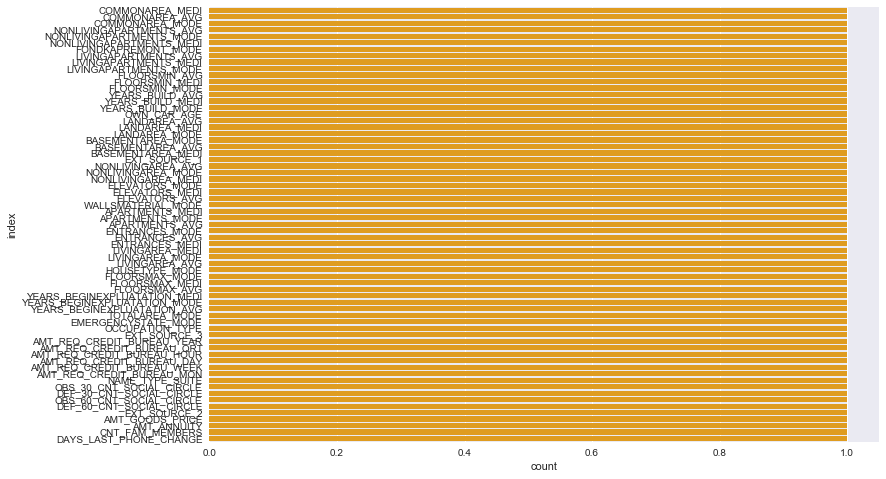

In [62]:
plt.figure(figsize=(12,8))
sns.countplot(y="index",data=df_anynull_df_count,color="orange")

In [63]:
df_train_objectlist=df_train.select_dtypes(include=["object"])
df_train_objectlist

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,FONDKAPREMONT_MODE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE
0,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3,reg oper account,block of flats,"Stone, brick",No
1,Cash loans,F,N,N,Family,State servant,Higher education,Married,House / apartment,Core staff,MONDAY,School,reg oper account,block of flats,Block,No
2,Revolving loans,M,Y,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,MONDAY,Government,NaN,NaN,NaN,NaN
3,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3,NaN,NaN,NaN,NaN
4,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Core staff,THURSDAY,Religion,NaN,NaN,NaN,NaN
5,Cash loans,M,N,Y,"Spouse, partner",State servant,Secondary / secondary special,Married,House / apartment,Laborers,WEDNESDAY,Other,NaN,NaN,NaN,NaN
6,Cash loans,F,Y,Y,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,Accountants,SUNDAY,Business Entity Type 3,NaN,NaN,NaN,NaN
7,Cash loans,M,Y,Y,Unaccompanied,State servant,Higher education,Married,House / apartment,Managers,MONDAY,Other,NaN,NaN,NaN,NaN
8,Cash loans,F,N,Y,Children,Pensioner,Secondary / secondary special,Married,House / apartment,NaN,WEDNESDAY,XNA,NaN,NaN,NaN,NaN
9,Revolving loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,THURSDAY,Electricity,NaN,NaN,NaN,NaN


## 男女別の利用方法の分布

男女別に利用方法別にどのくらい人数がいるのか確認してみよう。

まず、データセットとして、利用方法の分類にどのような値を設定しているのか確認しておこう。

In [64]:
df_train_objectlist["NAME_CONTRACT_TYPE"].unique()

array(['Cash loans', 'Revolving loans'], dtype=object)

念のため、欠損値を含んでいるかどうかも確認しておこう。

In [65]:
df_train_objectlist["NAME_CONTRACT_TYPE"].isnull().any()

False

上記の確認で、"Cash loans"(キャッシング)と"Revolving loans"(リボ払い)の契約タイプがあることがわかっているので、男女別に利用者の人数をグラフかしてみよう。

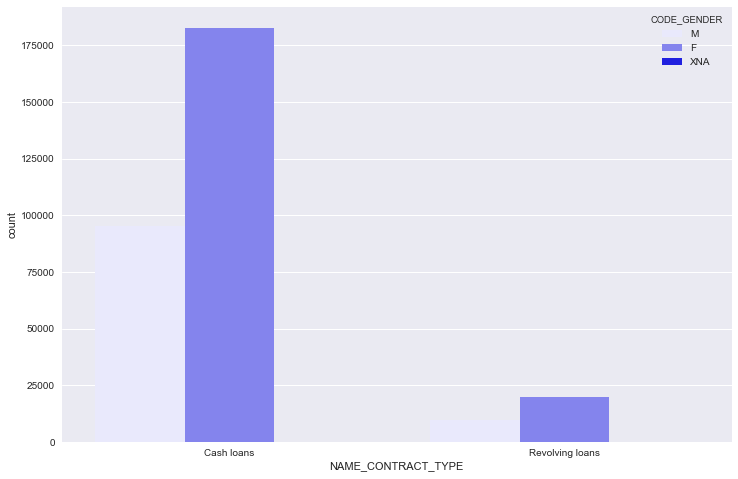

In [66]:
plt.figure(figsize=(12,8))
sns.countplot(x="NAME_CONTRACT_TYPE",hue="CODE_GENDER",data=df_train_objectlist,color="blue")

## 男女別収入タイプの分布

どのような収入タイプを設定していて、またそれぞれの分布もみてみよう。

In [67]:
df_train["NAME_INCOME_TYPE"].unique() ,df_train["NAME_INCOME_TYPE"].isnull().any()

(array(['Working', 'State servant', 'Commercial associate', 'Pensioner',
        'Unemployed', 'Student', 'Businessman', 'Maternity leave'], dtype=object),
 False)

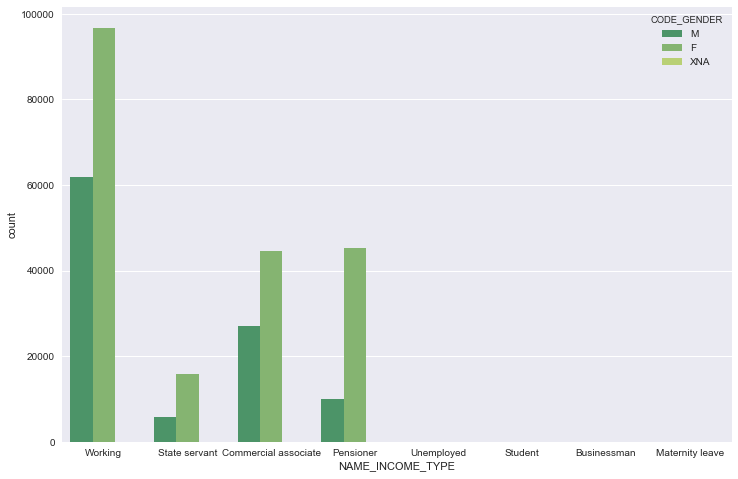

In [68]:
plt.figure(figsize=(12,8))
sns.countplot(x="NAME_INCOME_TYPE",hue="CODE_GENDER",data=df_train_objectlist,palette="summer")

## 年収の分布

お金がらみの話なので、当然年収も確認しておく必要がある。年収の分布を確認してみよう。

In [69]:
df_train["AMT_INCOME_TOTAL"].describe()

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

/Users/hiroshi/.pyenv/versions/anaconda3-4.3.0/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


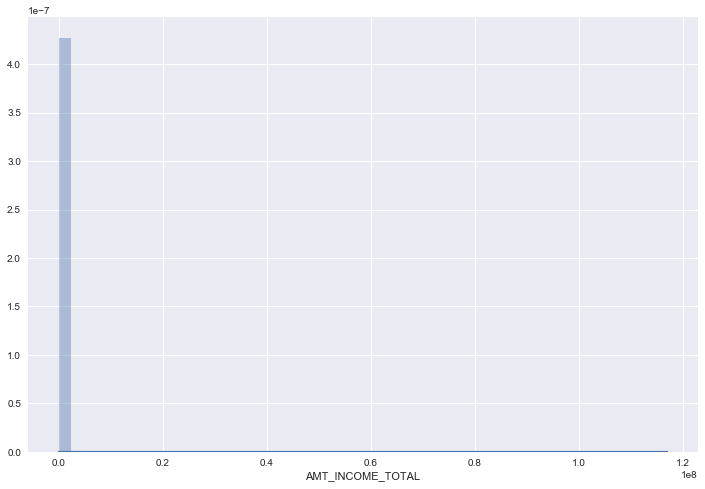

In [70]:
plt.figure(figsize=(12,8))
sns.distplot(df_train["AMT_INCOME_TOTAL"])

この分布図では、なにがなんだかよくわからない。おそらく外れ値を含んでいるためこのようになっていると思われる。

別のグラフでも確認してみよう。

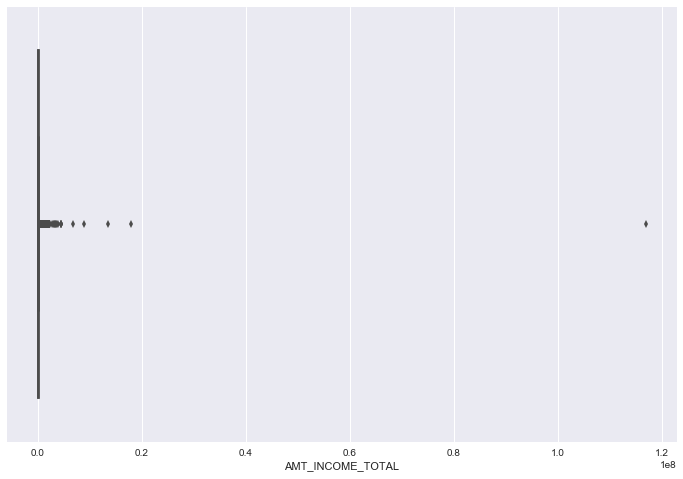

In [71]:
plt.figure(figsize=(12,8))
sns.boxplot(df_train["AMT_INCOME_TOTAL"])

やはり外れ値があることは間違えないようだ。

「外れ値を取り除くべきなのかどうか」という問題もあるが、一旦外れ値を除いて確認してみよう。

ここではIQRに基づいた方法で外れ値を取り除いておく。

In [72]:
weight_q1 = stats.scoreatpercentile(df_train["AMT_INCOME_TOTAL"], 25) #第一四分位数（=25パーセンタイル）
weight_q3 = stats.scoreatpercentile(df_train["AMT_INCOME_TOTAL"], 75) #第三四分位数（=75パーセンタイル）
weight_iqr = weight_q3 - weight_q1 #四分位範囲
weight_iqr

weight_iqr_min = weight_q1 - (weight_iqr) * 1.5 #第一四分位数 から四分位範囲（iqr*1.5）を引き算。
weight_iqr_max = weight_q3 + (weight_iqr) * 1.5 #第一四分位数 から四分位範囲（iqr*1.5）を。


In [73]:
df_train[df_train["AMT_INCOME_TOTAL"]>weight_iqr_max].index
df_drop_outliear=df_train.drop(df_train[df_train["AMT_INCOME_TOTAL"]>weight_iqr_max].index.values)

df_drop_outliear
# df_drop_outliear=  \
# df_train["AMT_INCOME_TOTAL"].drop(df_train[df_train["AMT_INCOME_TOTAL"]<weight_iqr_min])

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.000,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.000,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.000,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.000,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.000,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
5,100008,0,Cash loans,M,N,Y,0,99000.000,490495.5,27517.5,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
6,100009,0,Cash loans,F,Y,Y,1,171000.000,1560726.0,41301.0,...,0,0,0,0,0.0,0.0,0.0,1.0,1.0,2.0
8,100011,0,Cash loans,F,N,Y,0,112500.000,1019610.0,33826.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
9,100012,0,Revolving loans,M,N,Y,0,135000.000,405000.0,20250.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
10,100014,0,Cash loans,F,N,Y,1,112500.000,652500.0,21177.0,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,0.0


In [74]:
df_drop_outliear.shape

(293476, 122)

無事取り除けていることが確認できた。

また、残ったデータで分布図を作成してみるとこのようになる。峰がいくつもあるので、さまざまな種別のデータが混じってしまっていると思われる。

/Users/hiroshi/.pyenv/versions/anaconda3-4.3.0/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


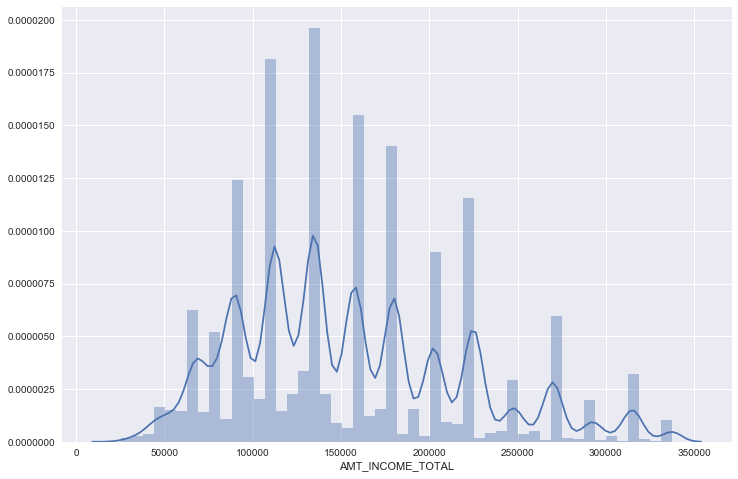

In [75]:
plt.figure(figsize=(12,8))
sns.distplot(df_drop_outliear["AMT_INCOME_TOTAL"])

In [76]:
df_train_outlies=df_train[df_train["AMT_INCOME_TOTAL"]>weight_iqr_max]
df_train_outlies.sort_values(by="AMT_INCOME_TOTAL",ascending=False).reset_index()


,index,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,12840,114967,1,Cash loans,F,N,Y,1,117000000.0,562491.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,203693,336147,0,Cash loans,M,Y,Y,2,18000090.0,675000.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,246858,385674,0,Cash loans,M,Y,Y,0,13500000.0,1400503.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,77768,190160,0,Cash loans,F,Y,N,0,9000000.0,1431531.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
4,131127,252084,0,Cash loans,M,Y,N,0,6750000.0,790830.0,...,0,0,0,0,0.0,0.0,1.0,0.0,0.0,4.0
5,103006,219563,0,Revolving loans,M,Y,Y,0,4500000.0,2250000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
6,187833,317748,0,Cash loans,M,N,N,0,4500000.0,835380.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
7,204564,337151,0,Cash loans,M,N,N,0,4500000.0,450000.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
8,287463,432980,0,Cash loans,M,Y,Y,0,4500000.0,1755000.0,...,0,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0
9,181698,310601,0,Cash loans,M,Y,Y,1,3950059.5,675000.0,...,1,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0


/Users/hiroshi/.pyenv/versions/anaconda3-4.3.0/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


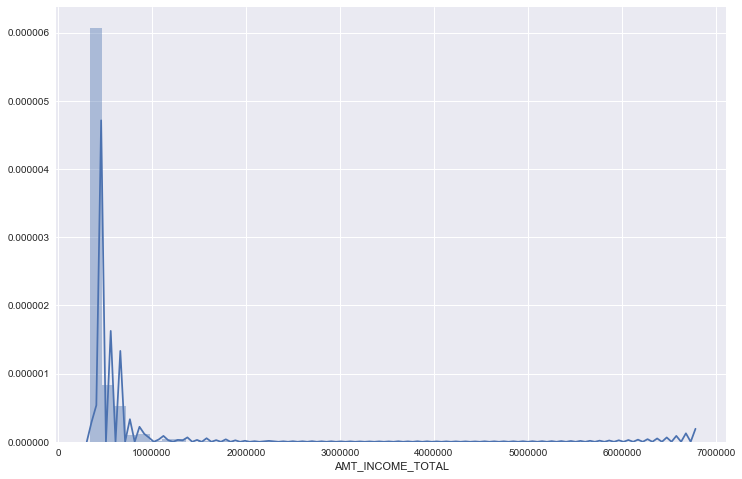

In [77]:
df_train_outlies_special = df_train_outlies.sort_values(by="AMT_INCOME_TOTAL",ascending=False).reset_index()
plt.figure(figsize=(12,8))
sns.distplot(df_train_outlies_special["AMT_INCOME_TOTAL"][4:])

/Users/hiroshi/.pyenv/versions/anaconda3-4.3.0/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


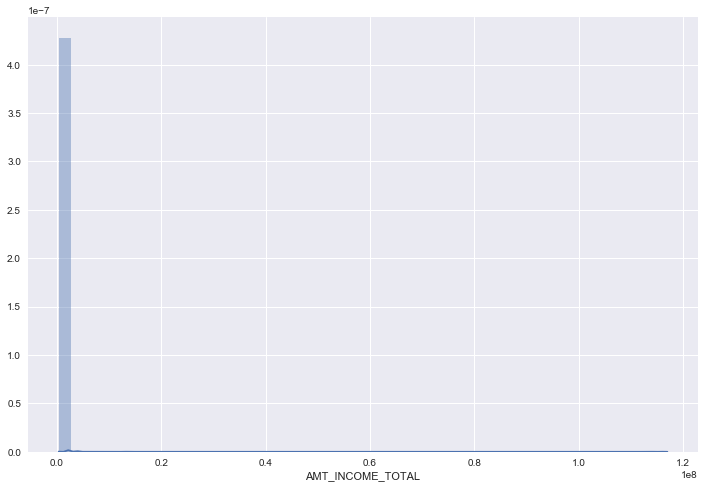

In [78]:
plt.figure(figsize=(12,8))
sns.distplot(df_train_outlies["AMT_INCOME_TOTAL"])

In [79]:
df_income_max=df_train["AMT_INCOME_TOTAL"].loc[(df_train["AMT_INCOME_TOTAL"] == df_train["AMT_INCOME_TOTAL"].max())].index
df_max_droped=df_train.drop(df_income_max.values,axis=0)

# df_train[index == df_income_max]
#df_train.loc[df_income_max]
# df_train.drop(df_income_max)
# df_train.shape


/Users/hiroshi/.pyenv/versions/anaconda3-4.3.0/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


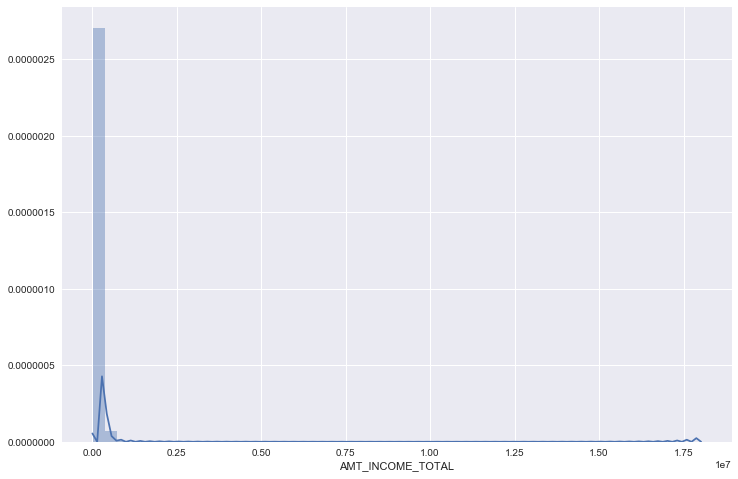

In [80]:
plt.figure(figsize=(12,8))
sns.distplot(df_max_droped["AMT_INCOME_TOTAL"])

In [81]:
top_data=df_train_outlies_special.iloc[0].reset_index()
top_data

,index,0
0,index,12840
1,SK_ID_CURR,114967
2,TARGET,1
3,NAME_CONTRACT_TYPE,Cash loans
4,CODE_GENDER,F
5,FLAG_OWN_CAR,N
6,FLAG_OWN_REALTY,Y
7,CNT_CHILDREN,1
8,AMT_INCOME_TOTAL,1.17e+08
9,AMT_CREDIT,562491


In [82]:
top_data.loc[top_data[0].isnull()]

,index,0
22,OWN_CAR_AGE,NaN
48,YEARS_BUILD_AVG,NaN
49,COMMONAREA_AVG,NaN
53,FLOORSMIN_AVG,NaN
55,LIVINGAPARTMENTS_AVG,NaN
57,NONLIVINGAPARTMENTS_AVG,NaN
58,NONLIVINGAREA_AVG,NaN
62,YEARS_BUILD_MODE,NaN
63,COMMONAREA_MODE,NaN
67,FLOORSMIN_MODE,NaN


In [83]:
df_train["OCCUPATION_TYPE"].unique()

array(['Laborers', 'Core staff', 'Accountants', 'Managers', nan, 'Drivers',
       'Sales staff', 'Cleaning staff', 'Cooking staff',
       'Private service staff', 'Medicine staff', 'Security staff',
       'High skill tech staff', 'Waiters/barmen staff',
       'Low-skill Laborers', 'Realty agents', 'Secretaries', 'IT staff',
       'HR staff'], dtype=object)

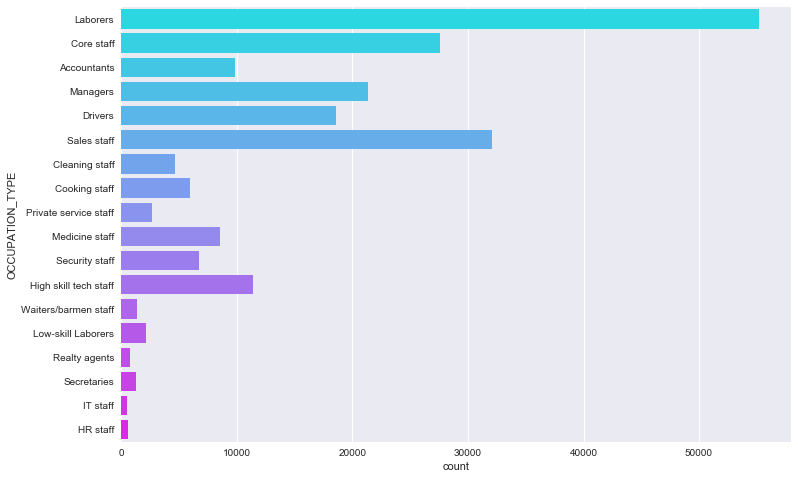

In [84]:
df_train_occupation=df_train["OCCUPATION_TYPE"].reset_index()
plt.figure(figsize=(12,8))
sns.countplot(y="OCCUPATION_TYPE",data=df_train_occupation,palette="cool")

In [85]:
df_drop_outliear["OCCUPATION_TYPE"].fillna("No work")
#df_drop_outliear.loc[307507].reset_index()
df_train.loc[df_train["OCCUPATION_TYPE"].values == "No work"].reset_index()
#df_drop_outliear["OCCUPATION_TYPE"].sort_values("index")
#df_drop_outliear.loc[df_drop_outliear["OCCUPATION_TYPE"] == "No work"]

,index,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR


In [86]:
df_drop_outliear.loc[df_drop_outliear["OCCUPATION_TYPE"].isnull()].shape

(93113, 122)

In [87]:
occupation_groupby=df_train_occupation.groupby("OCCUPATION_TYPE")
occupation_groupby

In [88]:
occupation_list=df_drop_outliear["OCCUPATION_TYPE"].dropna().unique()
list(occupation_list)

['Laborers',
 'Core staff',
 'Accountants',
 'Drivers',
 'Sales staff',
 'Cleaning staff',
 'Cooking staff',
 'Private service staff',
 'Managers',
 'Medicine staff',
 'Security staff',
 'High skill tech staff',
 'Waiters/barmen staff',
 'Low-skill Laborers',
 'Realty agents',
 'Secretaries',
 'IT staff',
 'HR staff']

/Users/hiroshi/.pyenv/versions/anaconda3-4.3.0/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


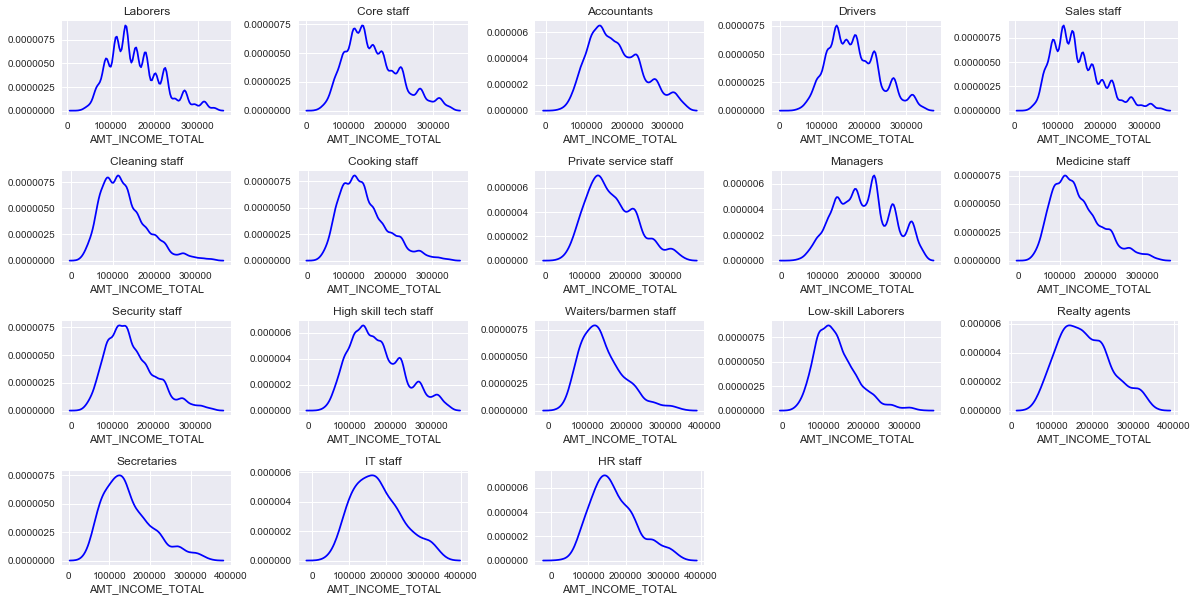

In [89]:
fig=plt.figure(figsize=(20,10))

plt.subplots_adjust(wspace=0.4, hspace=0.6)

for i,k in zip(list(occupation_list),range(len(list(occupation_list)))):

    ax = fig.add_subplot(4,5, k+1)
    ax.set_title(i)
    sns.distplot(df_drop_outliear[df_drop_outliear["OCCUPATION_TYPE"] == i]["AMT_INCOME_TOTAL"],color="blue",hist=False)



In [90]:
df_drop_outliear.loc[df_drop_outliear["OCCUPATION_TYPE"] == "No work"].shape

(0, 122)

In [91]:
df_drop_outliear

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.000,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.000,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.000,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.000,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.000,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
5,100008,0,Cash loans,M,N,Y,0,99000.000,490495.5,27517.5,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
6,100009,0,Cash loans,F,Y,Y,1,171000.000,1560726.0,41301.0,...,0,0,0,0,0.0,0.0,0.0,1.0,1.0,2.0
8,100011,0,Cash loans,F,N,Y,0,112500.000,1019610.0,33826.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
9,100012,0,Revolving loans,M,N,Y,0,135000.000,405000.0,20250.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
10,100014,0,Cash loans,F,N,Y,1,112500.000,652500.0,21177.0,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,0.0


In [92]:
df_train["NAME_EDUCATION_TYPE"].unique()

array(['Secondary / secondary special', 'Higher education',
       'Incomplete higher', 'Lower secondary', 'Academic degree'], dtype=object)

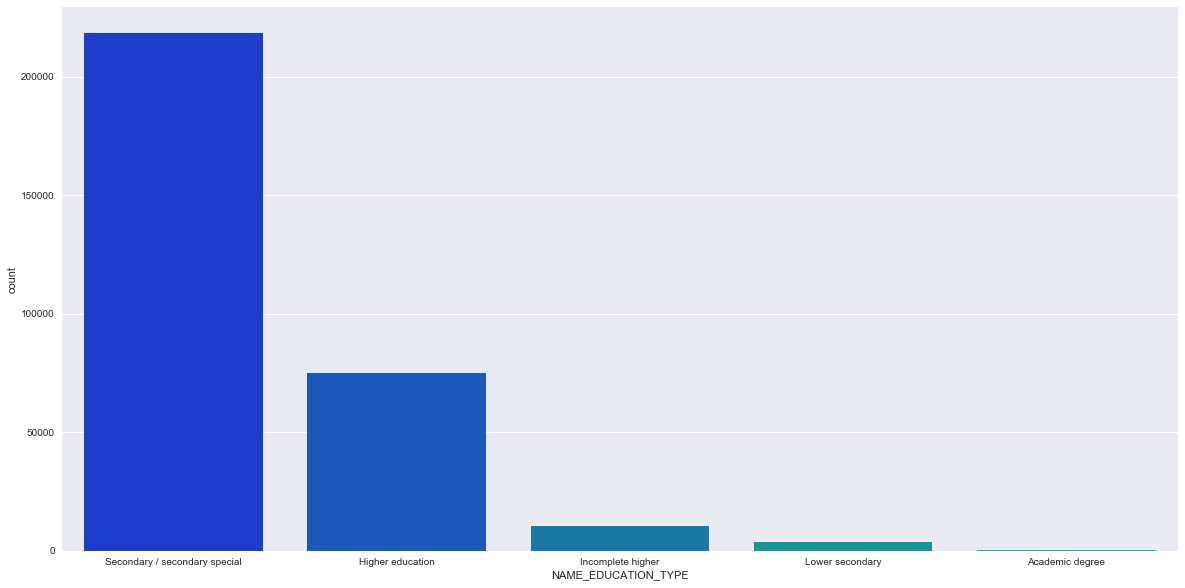

In [93]:
fig=plt.figure(figsize=(20,10))
sns.countplot(df_train["NAME_EDUCATION_TYPE"],palette="winter")

In [94]:
df_train["NAME_HOUSING_TYPE"].unique()

array(['House / apartment', 'Rented apartment', 'With parents',
       'Municipal apartment', 'Office apartment', 'Co-op apartment'], dtype=object)

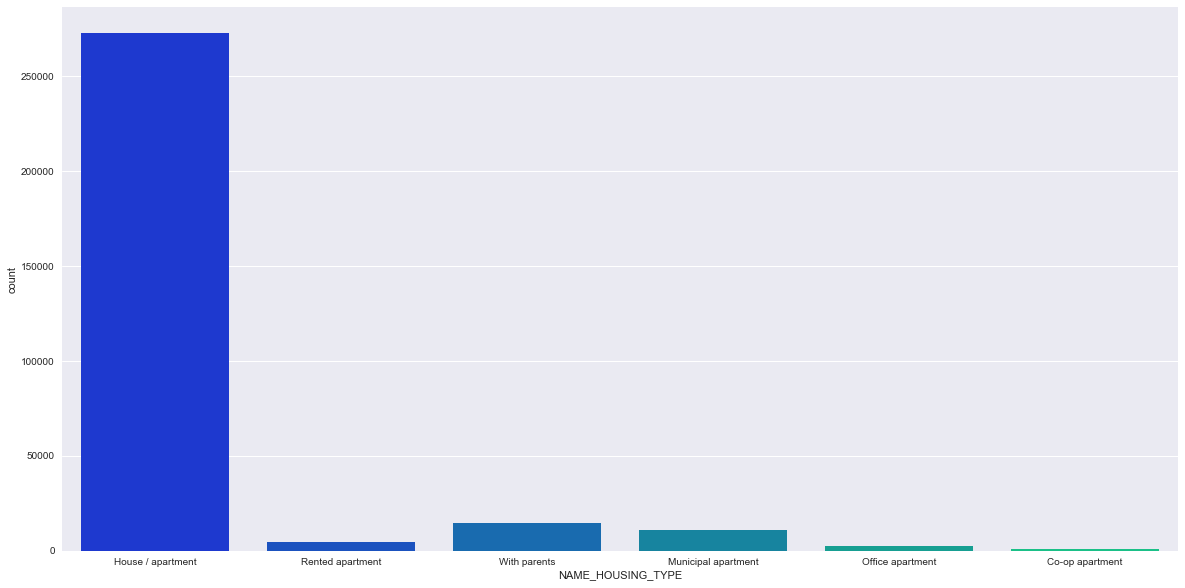

In [95]:
fig=plt.figure(figsize=(20,10))
sns.countplot(df_train["NAME_HOUSING_TYPE"],palette="winter")

In [96]:
target_income=df_drop_outliear[["TARGET","NAME_INCOME_TYPE"]]

groupby_incometype=target_income.groupby("NAME_INCOME_TYPE")["TARGET"].count()

groupby_incometype
# plt.figure(figsize=(12,8))
# groupby_incometype.plot.bar()

NAME_INCOME_TYPE
Businessman                  4
Commercial associate     65139
Maternity leave              4
Pensioner                54263
State servant            20475
Student                     17
Unemployed                  22
Working                 153552
Name: TARGET, dtype: int64

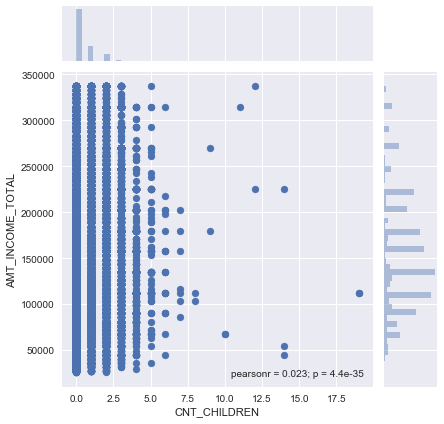

In [97]:
fig=plt.figure(figsize=(20,10))
#sns.boxplot(df_drop_outliear["CNT_CHILDREN"])
sns.jointplot(y=df_drop_outliear["AMT_INCOME_TOTAL"], x=df_drop_outliear["CNT_CHILDREN"])

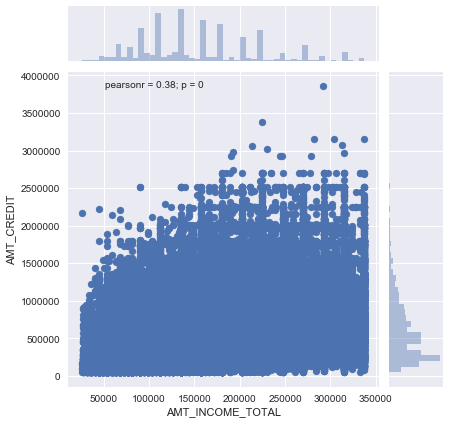

In [98]:
fig=plt.figure(figsize=(20,10))
sns.jointplot(x=df_drop_outliear["AMT_INCOME_TOTAL"], y=df_drop_outliear["AMT_CREDIT"])

/Users/hiroshi/.pyenv/versions/anaconda3-4.3.0/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


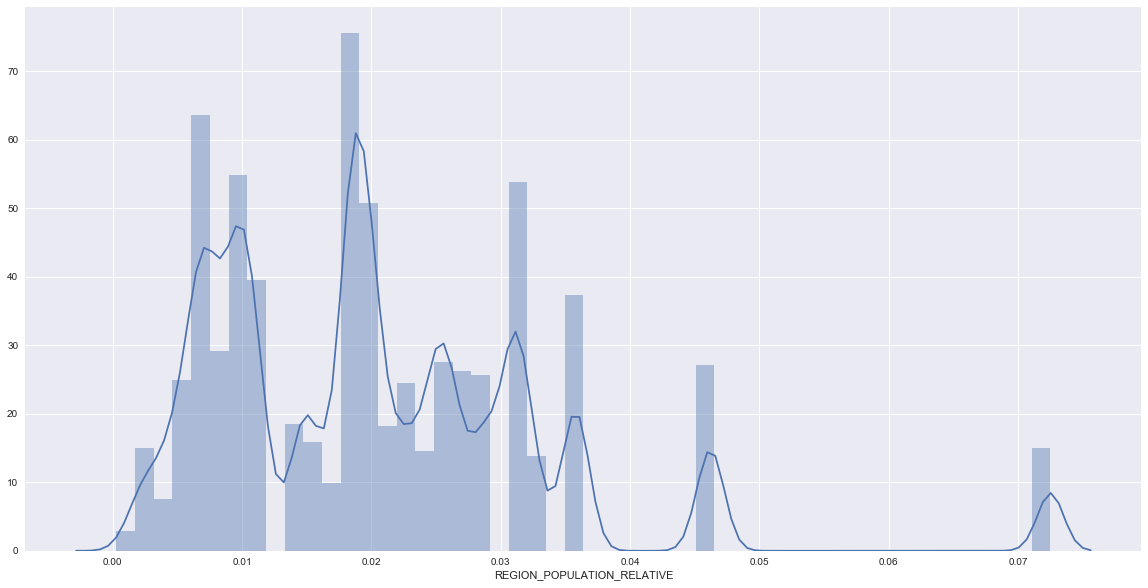

In [99]:
fig=plt.figure(figsize=(20,10))
sns.distplot(df_drop_outliear["REGION_POPULATION_RELATIVE"])

/Users/hiroshi/.pyenv/versions/anaconda3-4.3.0/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


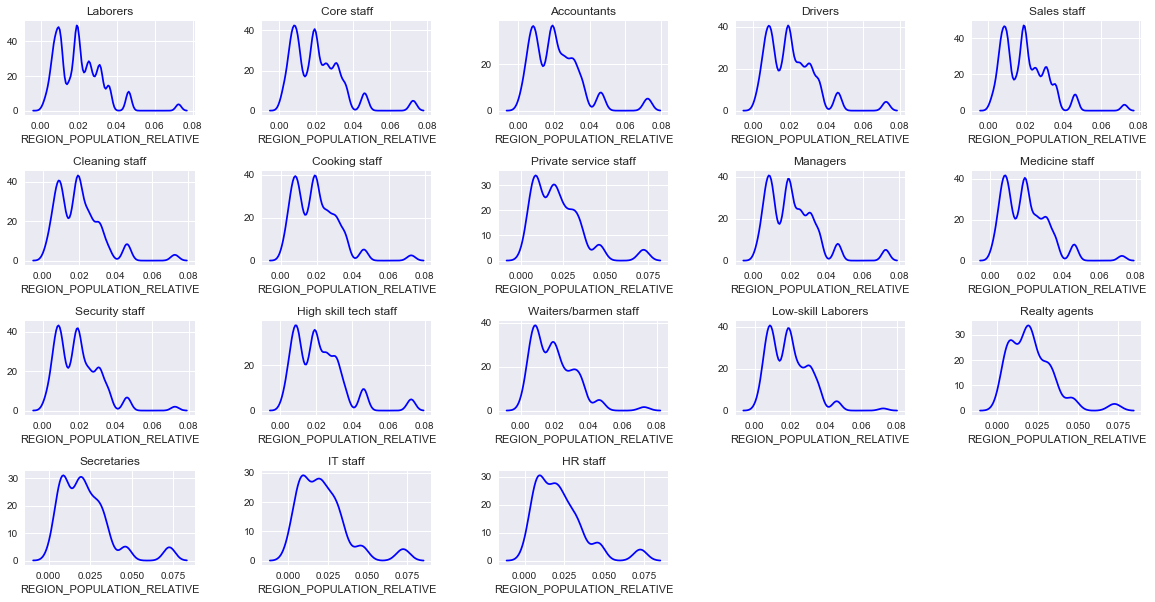

In [100]:
fig=plt.figure(figsize=(20,10))

plt.subplots_adjust(wspace=0.4, hspace=0.6)

for i,k in zip(list(occupation_list),range(len(list(occupation_list)))):

    ax = fig.add_subplot(4,5, k+1)
    ax.set_title(i)
    sns.distplot(df_drop_outliear[df_drop_outliear["OCCUPATION_TYPE"] == i]["REGION_POPULATION_RELATIVE"],color="blue",hist=False)



/Users/hiroshi/.pyenv/versions/anaconda3-4.3.0/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


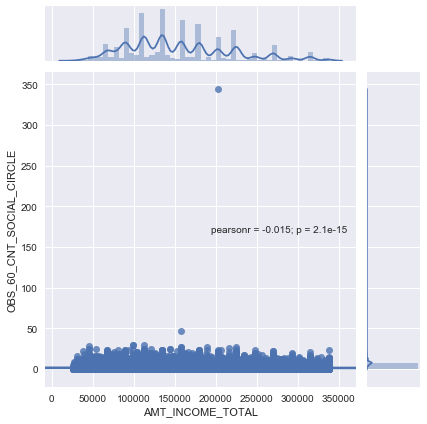

In [101]:
fig=plt.figure(figsize=(20,10))
sns.jointplot(x=df_drop_outliear["AMT_INCOME_TOTAL"], y=df_drop_outliear["OBS_60_CNT_SOCIAL_CIRCLE"],kind="reg")

In [102]:
df_drop_outliear["OBS_60_CNT_SOCIAL_CIRCLE"].isnull().any()

True

In [103]:
df_drop_outliear=df_drop_outliear["OBS_60_CNT_SOCIAL_CIRCLE"].fillna(0)

In [104]:
df_drop_outliear.isnull().any()

False

In [105]:
# weight_q1 = stats.scoreatpercentile(df_drop_outliear["OBS_60_CNT_SOCIAL_CIRCLE"], 25) #第一四分位数（=25パーセンタイル）
# weight_q3 = stats.scoreatpercentile(df_drop_outliear["OBS_60_CNT_SOCIAL_CIRCLE"], 75) #第三四分位数（=75パーセンタイル）
# weight_iqr = weight_q3 - weight_q1 #四分位範囲
# weight_iqr

# weight_iqr_min = weight_q1 - (weight_iqr) * 1.5 #第一四分位数 から四分位範囲（iqr*1.5）を引き算。
# weight_iqr_max = weight_q3 + (weight_iqr) * 1.5 #第一四分位数 から四分位範囲（iqr*1.5）を。

# df_drop_outliear[df_drop_outliear["OBS_60_CNT_SOCIAL_CIRCLE"]>weight_iqr_max].index
# df_drop_outliear=df_drop_outliear.drop(df_drop_outliear[df_drop_outliear["OBS_60_CNT_SOCIAL_CIRCLE"]>weight_iqr_max].index.values)

# df_drop_outliear

# plt.figure(figsize=(12,8))
# sns.distplot(df_drop_outliear["OBS_60_CNT_SOCIAL_CIRCLE"])